# Henrique Hundsdorfer Vedoveli

###**Data cleaning**
> Utilizando o Dataset importado foi possível perceber que existem 18 filmes sem notas médias que foram retirados pois não fazia sentido continuar com esses dados.

> Foram retirados também do Dataset os filmes com menos de 50 votos, sendo assim o filme com mais votos tem 329 votos e com menos 50 votos respectivamente. 

--- 

###**Análise do histograma do total de votos e nota média**
> Analisando o histograma com o total de votos é possivel analisar que o histograma começa com 50 votos, e a total máximo de votos é 329, olhando o gráfico é possivel ver que existem vários filmes com poucos votos e poucos filmes com muitos votos, caracterizando um gráfico assimétrico a direita. O mesmo ocorre para o gráfico cumulativo, não ocorre nenhuma anomalia, com pouco crescimento para muitos votos.

>Para o histograma de notas médias a distribuição de notas é parecida com uma distribuição normal, apesar de não ter realizado nenhum teste estatístico ainda. O gráfico cumulativo não tem nenhuma anormalidade seguindo uma distribuição regular. Além disso foi possível concluir que apenas 20% dos filmes tem notas maior que 3.99.

---

###**Genêros com mais e menos filmes**
> Ao analizar os gêneros dos filmes foi possível concluir que os cinco gêneros com mais filmes são: Comedy com 181 filmes, Drama com 166 filmes, Action com 164 filmes, Adventure com 132 filmes e Thriller com 121 filmes. E os gêneros que menos contêm filmes são Western, FilmNoir e Documentary.

---

###**Média de votos por filmes**
> Observando o DataFrame com a média dos votos que cada gênero recebeu por filme podemos ver que o gênero com mais números de votos por filmes é o gênero War com uma média 111.2 votos. Os gêneros seguintes seguem quase a mesma média, variando entre 99 e 84, os três últimos gêneros apresentam um valor discrepante, sendo eles Western (75.0), FilmNoir (72.8), Documentary (54.0).

---

###**Filmes mais assistidos dos gêneros mais assistidos**
> Os dois gêneros mais assistidos são: Action e Drama (a análise foi feita com base no número de votos). Os filmes com maior nota média dentre os gêneros são:

- **Action**  

|Titúlo| Média de Votos|
|------|-------------:|
|Fight Club|4.27|
|The Dark Knight|4.24|
|The Princess Bride|4.23|
|Star War: Episode IV -  A New Hope|4.23|
|Star Wars: Episode V - The Empire Strikes Back|4.22|


- **Drama**

|Titúlo| Média de Votos|
|------|-------------:|
|The Shawshank Redemption|4.43|
|The Godfather|4.29|
| Fight Club|4.27|
|Cool Hand Luke|4.27|
|The Godfather: Part II|4.26|

---

###**Relação entre ano de lançamento e a nota média**
> Ao analisar a correlação dos dados é possível concluir que os dados do ano de lançamento e nota média tem um correlação negativa, quanto mais ano de lançamento aumenta mais nota media diminui. Um dos motivos que pode ter gerado esse tipo de correlação é que filmes antigos receberam menos notas.

---

###**Sugestão para escolha entre Adventure ou Horror**
> Minha sugestão as três questões levantadas sobre qual gênero seria melhor fazer um filme, para as três minha resposta é que o genêro Adventure seria o melhor. Devido a diversos fatores explicados.

---

###**Análise genêro Animation**
> Utilizando os gráficos gerados foi possível concluir que a medida que os anos aumentam a nota média e o total de votos que os filmes do genêro recebe aumenta também, apesar da correlação ser baixa.



## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet

# Não instalei as bibliotecas porque dava erro ao ler os arquivos .csv 
# e as bibliotecas ja estão em versões mais atualizadas.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt


print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.3
Usando seaborn 0.10.0
Usando scipy 1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')
filmes.rename(columns={'movieId':'filmeId',
                      'title':'titulo',
                      'genres':'generos'}, inplace=True) 
filmes.set_index('filmeId', inplace=True)

filmes.head(3)

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


In [4]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [5]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head(3)

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [6]:
# solução
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')

notas.rename(columns={'userId':'usuarioId',
                      'movieId':'filmeId',
                      'rating':'nota',
                      'timestamp':'momento'}, inplace=True) 

notas.head(3)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [7]:
# criando a coluna nota_media no dataframe filmes
grupo = notas.groupby('filmeId')
filmes['nota_media'] = grupo['nota'].mean()

filmes.head(3)

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615


## Limpeza do Dataset

In [8]:
# É possivel observar que existem 18 filmes sem notas médias
print('Existem {} filmes sem notas médias.'.format(filmes['nota_media'].isnull().sum()))

Existem 18 filmes sem notas médias.


In [9]:
# Retirando os filmes sem nota média 
filmes = filmes.query('nota_media > 0')
print('Existem {} filmes sem notas médias.'.format(filmes['nota_media'].isnull().sum()))

Existem 0 filmes sem notas médias.


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [10]:
notas.head(3)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [0]:
# solução para calcular o total de votos por filme
total_votos_por_filmes = []
for i,_ in grupo:
  total_votos_por_filmes.append(len(grupo.groups[i]))

In [12]:
len(filmes) == len(total_votos_por_filmes)

True

In [0]:
# solução para criar a nova coluna e filtrar os filmes
#criação da nova coluna
filmes['total_de_votos'] = total_votos_por_filmes
# filtrando com 50 ou mais votos
selecao = filmes['total_de_votos'] >= 50
filmes = filmes[selecao]


In [14]:
# o máximo de votos que um filme recebeu e o minimo (depois do filtro)
filmes.total_de_votos.max(), filmes.total_de_votos.min()

(329, 50)

In [15]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Média de votos')

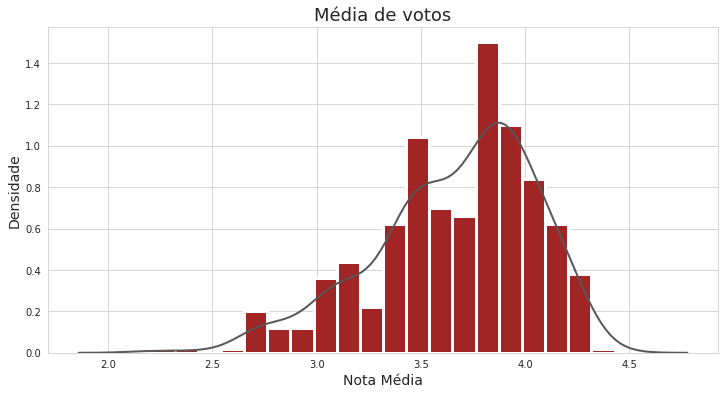

In [16]:
# solução histograma

# setando o estilo para os plots com seaborn
sns.set_style('whitegrid')

# -- GRAFICO --
ax = sns.distplot(filmes['nota_media'].values, bins = 20, kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Nota Média', fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_title('Média de votos', fontsize = 18)



In [17]:
print('A nota média máxima do dataset -- {}'.format(filmes['nota_media'].round(2).max()))
print('A nota média mínima do dataset -- {}'.format(filmes['nota_media'].round(2).min()))

A nota média máxima do dataset -- 4.43
A nota média mínima do dataset -- 2.21


Text(0.5, 1.0, 'Média de votos')

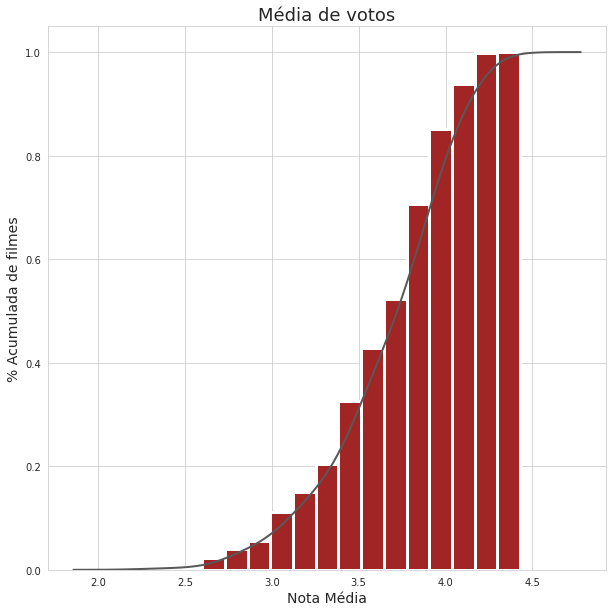

In [18]:
# solução cumulativa
# -- GRAFICO -- 
ax = sns.distplot(filmes['nota_media'].values, kde_kws={"color": "#585858", "lw": 2, 'cumulative':True},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525", 'cumulative':True})

# -- LEGENDA --
ax.figure.set_size_inches(10, 10)
ax.set_xlabel('Nota Média', fontsize = 14)
ax.set_ylabel('% Acumulada de filmes', fontsize = 14)
ax.set_title('Média de votos', fontsize = 18)

## Análise Gráfica

- Histograma: Fazendo a análise gráfica podemos observar que o gráfico inicia na nota média de 2.21 e termina na nota média 4.43. Tendo poucos votos para as notas médias baixas (2.0 a 3.0) as maiores notas estão entre o intervalo de 3.5 e 4.0.

- Histograma Cumulativo: acima é possivel concluir que a média acumulada dos votos em maior parte segue um padrão regular. 

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Histograma do Total de votos')

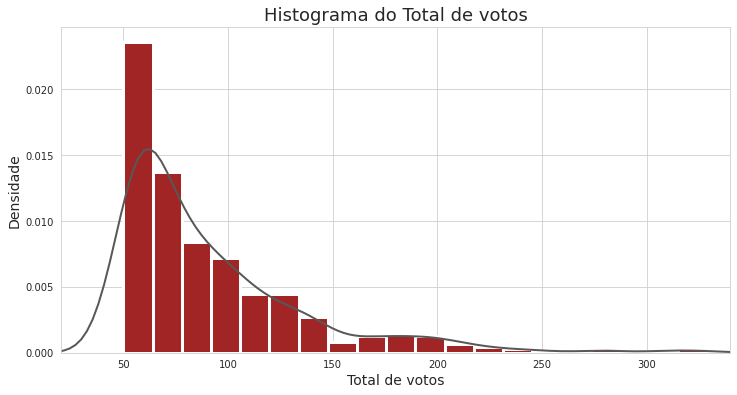

In [19]:
# solução histograma
# -- GRAFICO --
ax = sns.distplot(filmes['total_de_votos'], bins = 20, kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.set_xlim(20,340)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Total de votos', fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_title('Histograma do Total de votos', fontsize = 18)

In [20]:
print('O máximo de votos do dataset -- {}'.format(filmes['total_de_votos'].max()))
print('O minímo de votos do dataset -- {}'.format(filmes['total_de_votos'].min()))


O máximo de votos do dataset -- 329
O minímo de votos do dataset -- 50


Text(0.5, 1.0, 'Total de Votos Acumulado')

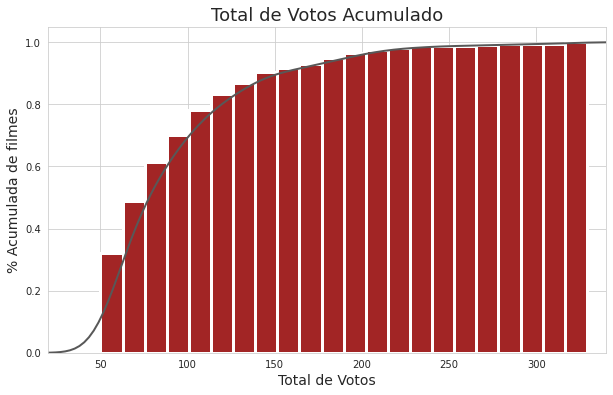

In [21]:
# solução cumulativa
# -- GRAFICO -- 
ax = sns.distplot(filmes['total_de_votos'], kde_kws={"color": "#585858", "lw": 2, 'cumulative':True},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525", 'cumulative':True})

# -- LEGENDA -- 
ax.set_xlim(20,340)
ax.figure.set_size_inches(10, 6)
ax.set_xlabel('Total de Votos', fontsize = 14)
ax.set_ylabel('% Acumulada de filmes', fontsize = 14)
ax.set_title('Total de Votos Acumulado', fontsize = 18)

## Análise Gráfica 

- Histograma: Analisando o histograma é possivel concluir que a maioria dos filmes recebe menos votos, no caso 50, e poucos filmes receberam muitos votos. O gráfico apresenta uma quebra de padrão depois dos 150 e volta ao normal após o 200.

- Histograma CDF: Analisando o CDF acima é possivel concluir que os dados não contém nenhuma anormalia

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução
valor = filmes['nota_media']
nota_limite_dos_20_porcento = valor.quantile(0.80)

# apenas 20 % dos filmes tem notas acima de 3.99.

In [23]:
print("20% dos filmes tem nota maior que de {}".format(nota_limite_dos_20_porcento))

20% dos filmes tem nota maior que de 3.992833035537026


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [24]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [25]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [26]:
# solução
lista_de_generos = []
for i in generos:
  lista_de_generos.append([generos[i].sum(), i])
lista_de_generos

[[164, 'Action'],
 [132, 'Adventure'],
 [32, 'Animation'],
 [47, 'Children'],
 [181, 'Comedy'],
 [87, 'Crime'],
 [2, 'Documentary'],
 [166, 'Drama'],
 [66, 'Fantasy'],
 [4, 'FilmNoir'],
 [26, 'Horror'],
 [28, 'IMAX'],
 [21, 'Musical'],
 [38, 'Mystery'],
 [85, 'Romance'],
 [92, 'SciFi'],
 [121, 'Thriller'],
 [19, 'War'],
 [12, 'Western']]

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [27]:
# solução
# Lista ordenada em forma crescente do gênero com mais filme para com menos
top_generos_em_quantidade_de_filmes = sorted(lista_de_generos, reverse = True)

ordenado , total_votos = [], []
for i in top_generos_em_quantidade_de_filmes:
    index = i[0]
    genero = i[1]
    ordenado.append([genero, index])
    total_votos.append(index)
ordenado

[['Comedy', 181],
 ['Drama', 166],
 ['Action', 164],
 ['Adventure', 132],
 ['Thriller', 121],
 ['SciFi', 92],
 ['Crime', 87],
 ['Romance', 85],
 ['Fantasy', 66],
 ['Children', 47],
 ['Mystery', 38],
 ['Animation', 32],
 ['IMAX', 28],
 ['Horror', 26],
 ['Musical', 21],
 ['War', 19],
 ['Western', 12],
 ['FilmNoir', 4],
 ['Documentary', 2]]

In [28]:
print('Os cinco gêneros com mais filmes são:', ordenado[:5])

Os cinco gêneros com mais filmes são: [['Comedy', 181], ['Drama', 166], ['Action', 164], ['Adventure', 132], ['Thriller', 121]]


In [29]:
# ordenando o DataFrame generos do genero com mais filme (esquerda), para com menos filme (direita)
# o nome do nome DataFrame ordenado é generos_ordenada

lista_ordenada_generos = []
for i in ordenado:
  lista_ordenada_generos.append(i[0])
lista_ordenada_generos

generos_ordenada = generos[lista_ordenada_generos]
generos_ordenada.head()

,Comedy,Drama,Action,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,IMAX,Horror,Musical,War,Western,FilmNoir,Documentary
filmeId,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [30]:
total_generos = pd.DataFrame(ordenado)
total_generos.rename(columns={0:'Gêneros',
                      1:'Total de Filmes'}, inplace=True) 

total_generos.head()

,Gêneros,Total de Filmes
0,Comedy,181
1,Drama,166
2,Action,164
3,Adventure,132
4,Thriller,121


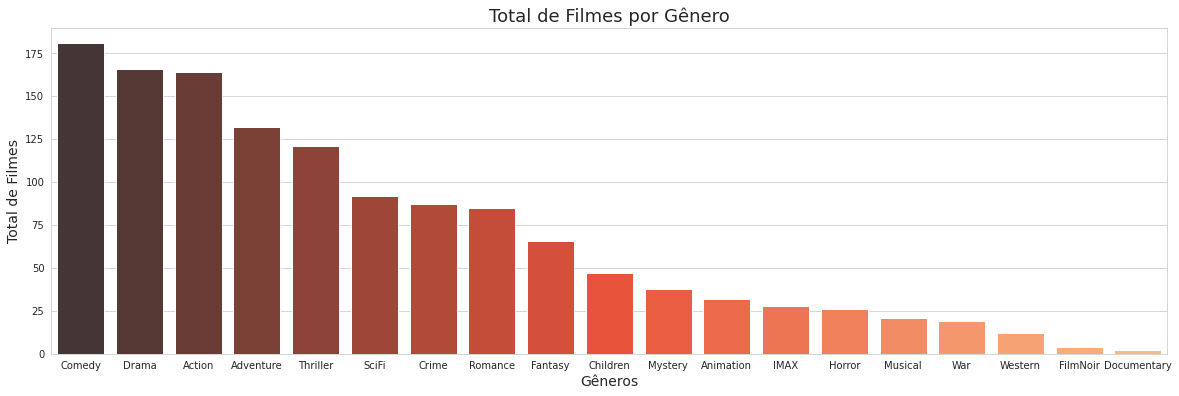

In [31]:
# visualização do total de filmes que cada gênero contem 

# -- GRAFICO -- 
ax = sns.barplot(x = 'Gêneros', y = 'Total de Filmes', data = total_generos,
                 palette = 'OrRd_d', saturation = 1)

# -- LEGENDA --
ax.set_title('Total de Filmes por Gênero', fontsize = 18)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Gêneros', fontsize = 14)
ax.set_ylabel('Total de Filmes', fontsize = 14)
ax

## Análise Gráfica

- Gráfico de Barras: Realizando a análise do gráfico de barras 'Total de Filmes por Gênero' é possível concluir que o Gênero Comedy é o gênero que mais contêm filmes, seguido por Drama e Action. Os gêneros que menos contêm filmes são Western, FilmNoir e Documentary.

## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [32]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0
1,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0
3,102,0,0,0,0,102,0,0,0,0,0,0,0,0,0,0,102,0,0
4,0,0,0,0,54,0,0,0,0,0,0,0,0,0,54,0,0,0,0


In [33]:
# solução 
## a lista votos contém o numero de votos que cada gênero recebeu e o do gênero
votos = []

for i in votos_por_genero_por_filme:
  votos.append([votos_por_genero_por_filme[i].sum() , i])
votos = sorted(votos, reverse = True)

votos

[[15734, 'Action'],
 [15445, 'Drama'],
 [15330, 'Comedy'],
 [13117, 'Adventure'],
 [11907, 'Thriller'],
 [8989, 'SciFi'],
 [8649, 'Crime'],
 [7444, 'Romance'],
 [5993, 'Fantasy'],
 [4331, 'Children'],
 [3452, 'Mystery'],
 [3066, 'Animation'],
 [2492, 'IMAX'],
 [2215, 'Horror'],
 [2113, 'War'],
 [1822, 'Musical'],
 [900, 'Western'],
 [291, 'FilmNoir'],
 [108, 'Documentary']]

In [34]:
# cria um DataFrame com colunas ordenadas da esquerda (mais filmes) para a direita (menos filmes)

lista_ordenada_1, lista_ordenada_2 = [], []
for i in votos:
  lista_ordenada_1.append(i[0])
  lista_ordenada_2.append(i[1])

df_votos = pd.DataFrame([lista_ordenada_1], columns=lista_ordenada_2)
df_votos

,Action,Drama,Comedy,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,IMAX,Horror,War,Musical,Western,FilmNoir,Documentary
0,15734,15445,15330,13117,11907,8989,8649,7444,5993,4331,3452,3066,2492,2215,2113,1822,900,291,108


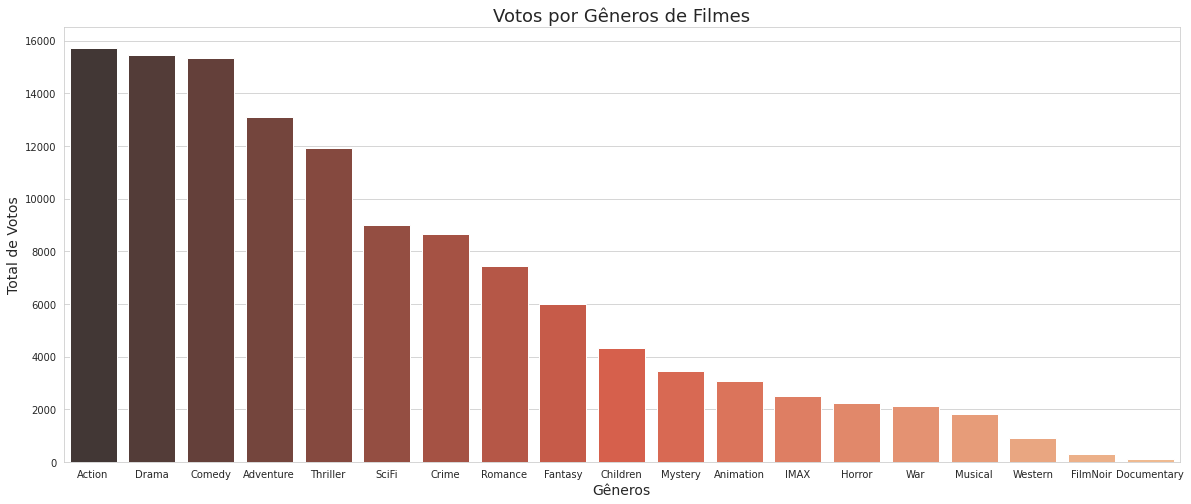

In [35]:
# solução
# -- GRAFICO -- 
ax = sns.barplot(data = df_votos, palette="OrRd_d", saturation= 0.8)
ax.set_title('Votos por Gêneros de Filmes', fontsize = 18)

# -- LEGENDA --
ax.figure.set_size_inches(20, 8)
ax.set_xlabel('Gêneros', fontsize = 14)
ax.set_ylabel('Total de Votos', fontsize = 14)
ax

## Análise Gráfica

- Gráfico de Barras: Observando o gráfico 'Votos por Gêneros de Filmes' podemos observar que os gêneros Action, Drama e Comedy são os gêneros com mais votos por gêneros que estão bem próximos os números de votos.

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [0]:
# solucao código
# criação das listas lista_filmes e votos, que contem o total de filmes de cada genero
# e o total de generos de cada generos.
lista_filmes, votos = [], []
for i in df_votos:
  lista_filmes.append(generos_ordenada.sum()[i])
  votos.append(df_votos[i][0])

In [0]:
# solucao código (continuação)
# criação da lista votos_por_filme que contem os votos por filmes de cada generos
# a ordem dos generos é a ordem do DF generos
index, votos_por_filme = 0, []
while index <= 18:
  votos_por_filme.append(((votos[index] / lista_filmes[index]).round(1)))
  index = index + 1

In [38]:
# solucao código (continuação)
# criação de um DataFrame com os votos medios que cada filme recebeu por gênero
# o nome do DF é votos_por_filme_generos
votos_por_filme_generos = {'Filmes':['Action','Drama','Comedy','Adventure','Thriller','SciFi','Crime','Romance','Fantasy','Children','Mystery','Animation','IMAX','Horror','War','Musical','Western','FilmNoir','Documentary'],
 'Votos por Filme': votos_por_filme}
votos_por_filme_generos = pd.DataFrame(votos_por_filme_generos)

# organizando o dataframe em ordem crescente
votos_por_filme_generos_ordenada = votos_por_filme_generos.sort_values(by = 'Votos por Filme', ascending= False)
votos_por_filme_generos_ordenada.index = range(0,len(votos_por_filme_generos_ordenada))
votos_por_filme_generos_ordenada

,Filmes,Votos por Filme
0,War,111.2
1,Adventure,99.4
2,Crime,99.4
3,Thriller,98.4
4,SciFi,97.7
5,Action,95.9
6,Animation,95.8
7,Drama,93.0
8,Children,92.1
9,Fantasy,90.8


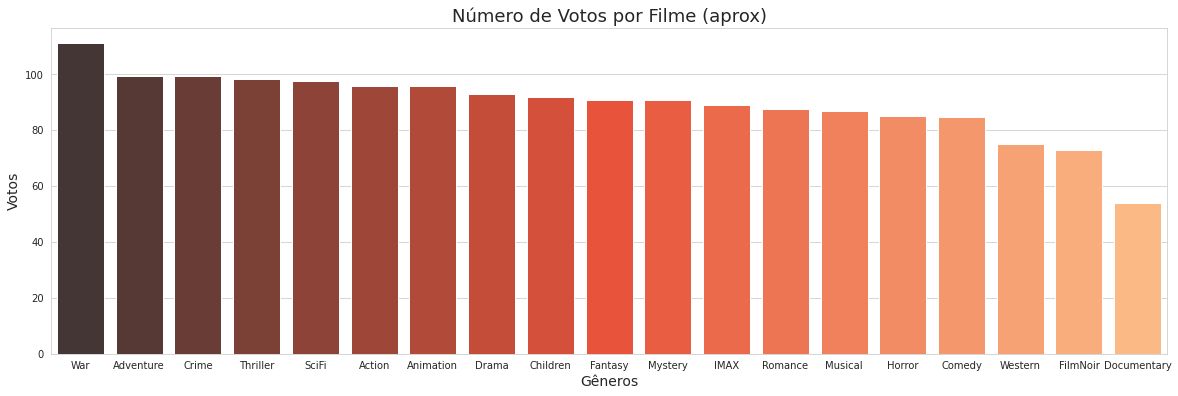

In [39]:
# solução com visualização 
# -- GRAFICO -- 
ax = sns.barplot(x = 'Filmes', y = 'Votos por Filme',  data = votos_por_filme_generos_ordenada, palette="OrRd_d", saturation=1 ,)

# -- LEGENDAS --
ax.set_title('Número de Votos por Filme (aprox)', fontsize = 18)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Gêneros', fontsize = 14)
ax.set_ylabel('Votos', fontsize = 14)
ax

## Análise Gráfica

 - Gráfico de Barras: Observando o gráfico de barras 'Número de Votos por Filme' é possível concluir que o gênero com mais números de votos por filmes é o gênero War com uma média de 111.2 votos por filmes. Os gêneros seguintes seguem quase a mesma média, variando entre 99 e 84, os três últimos gêneros apresentam um valor discrepante, sendo eles Western - 75.0, FilmNoir - 72.8, Documentary -	54.0

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    

O gênero Action é o terceiro gênero com mais filmes produzidos, são ao todo 164 filmes produzidos e esse pode ser um dos motivos pelo qual o gênero que mais contém contém votos (15734 votos). Por ter muitos filmes acaba tendo muitos votos.

Já o gênero War contém 19 filmes e 2113 votos, porém quando dividimos o número de votos por filmes, temos que cada filme tem em média 111.2 votos, sendo o gênero com mais votos por filmes.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 0, 'Total de Votos')

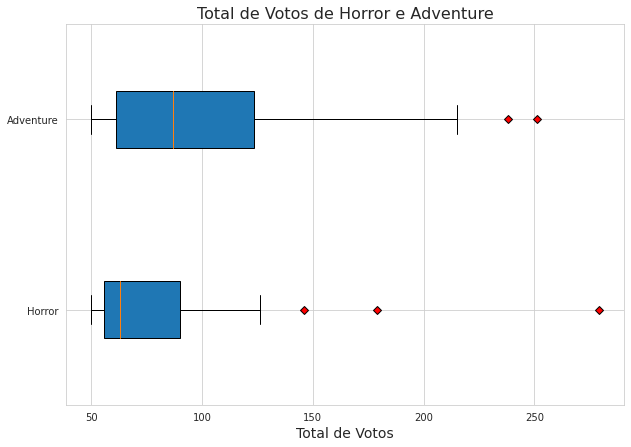

In [40]:
# solução:
filmes_adventure = filmes.query('Adventure == True')['total_de_votos']
filmes_horror = filmes.query('Horror == True')['total_de_votos']

# -- GRAFICO --
plt.figure(figsize=(10,7))
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot([filmes_horror, filmes_adventure], labels = ['Horror', 'Adventure'],
            patch_artist=True, flierprops=red_diamond,vert=False,widths=.3)

# -- LEGENDA --
plt.title("Total de Votos de Horror e Adventure", fontsize = 16)
plt.xlabel('Total de Votos',fontdict={'fontsize':14})

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [0]:
# a funcao faz realiza o boxplot recebendo como parametro o genero

def plota_boxplot(genero):
  #--GRAFICO--
  plt.figure(figsize=(10,5))
  plt.boxplot(filmes.query(f'{genero} == True')['total_de_votos'], labels = [f'{genero}'],
              patch_artist=True,flierprops=red_diamond,vert=False,widths=.3)#red_diamonds foi declarado acima
  #--LEGENDA--
  plt.title(f"Total de Votos {genero}", fontsize = 18)
  plt.xlabel('Total de Votos', fontdict={'fontsize':14})
  

In [42]:
print('Total de boxplots a serem feitos -->',len(generos.columns))

Total de boxplots a serem feitos --> 19


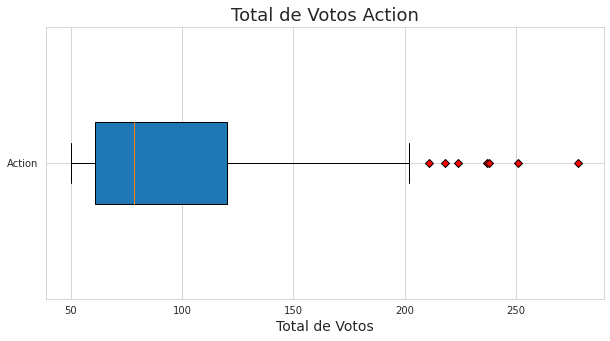

In [43]:
plota_boxplot(generos.columns[0])

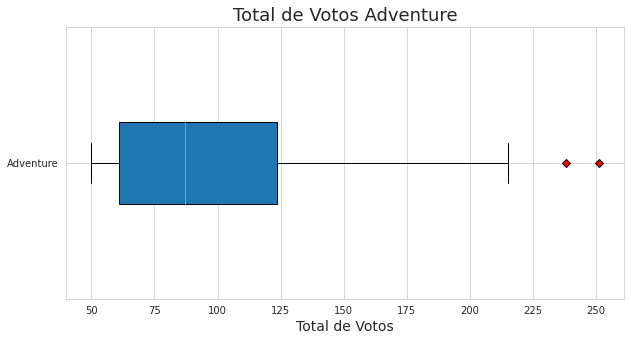

In [44]:
plota_boxplot(generos.columns[1])

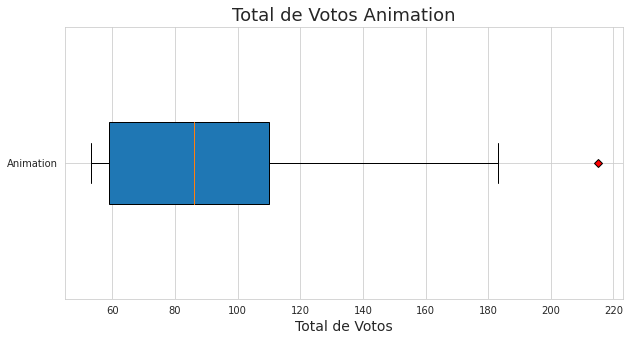

In [45]:
plota_boxplot(generos.columns[2])

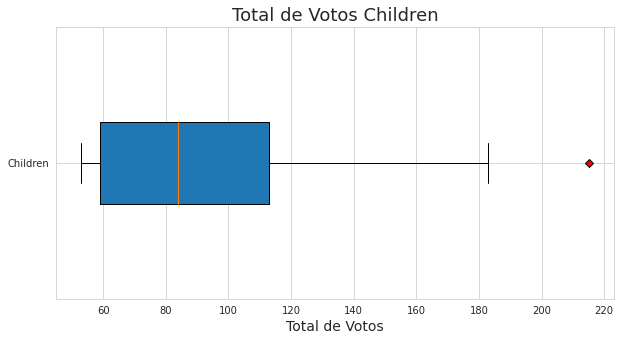

In [46]:
plota_boxplot(generos.columns[3])

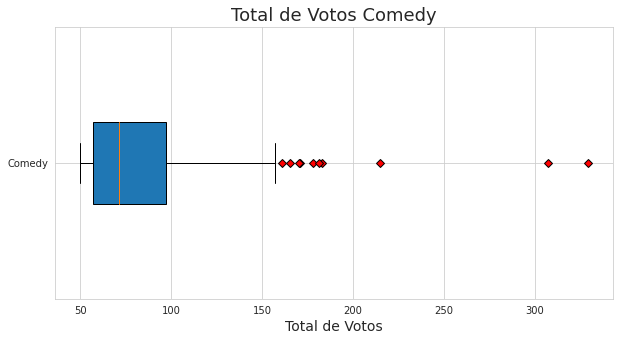

In [47]:
plota_boxplot(generos.columns[4])

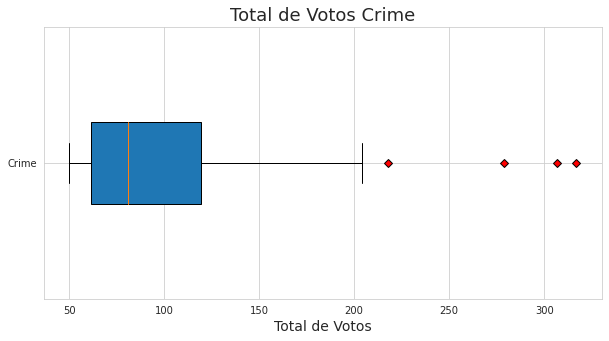

In [48]:
plota_boxplot(generos.columns[5])

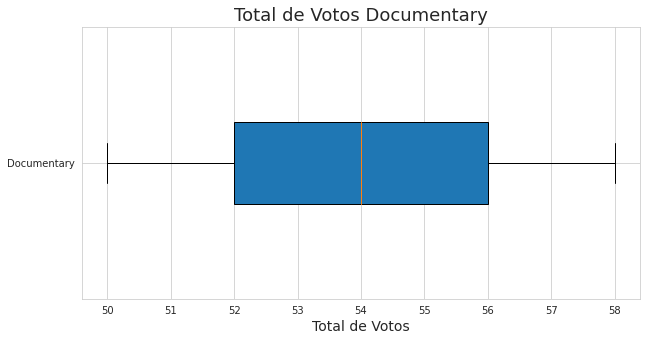

In [49]:
plota_boxplot(generos.columns[6])

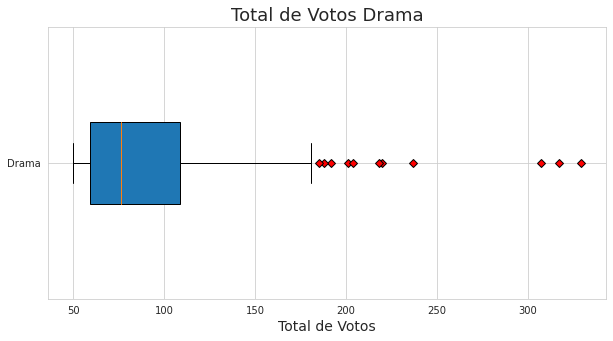

In [50]:
plota_boxplot(generos.columns[7])

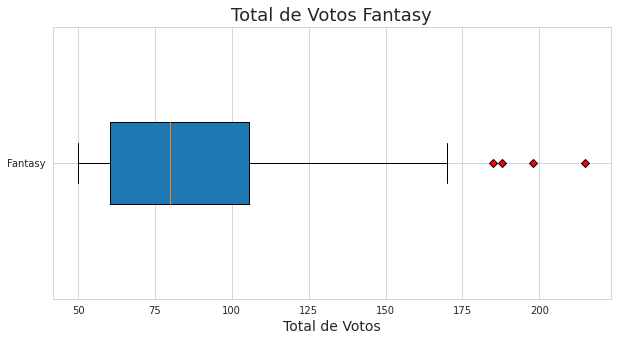

In [51]:
plota_boxplot(generos.columns[8])

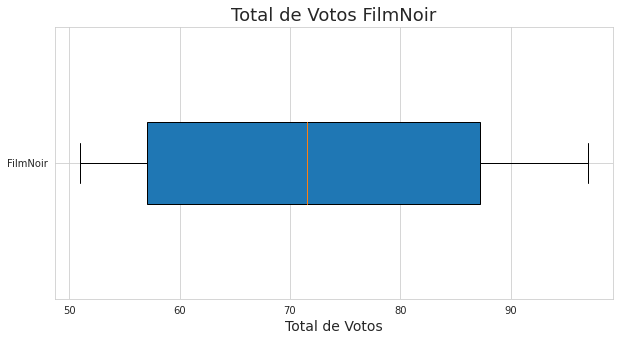

In [52]:
plota_boxplot(generos.columns[9])

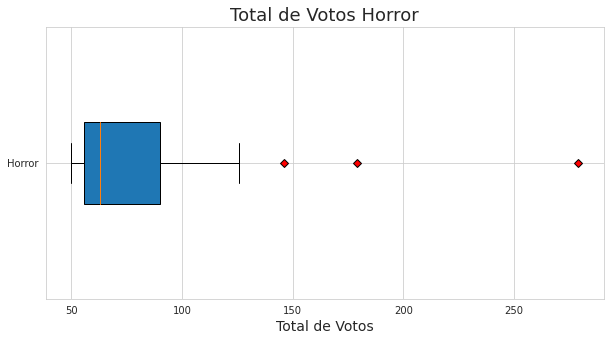

In [53]:
plota_boxplot(generos.columns[10])

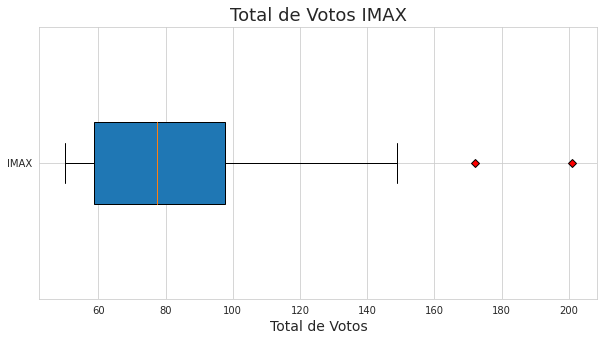

In [54]:
plota_boxplot(generos.columns[11])

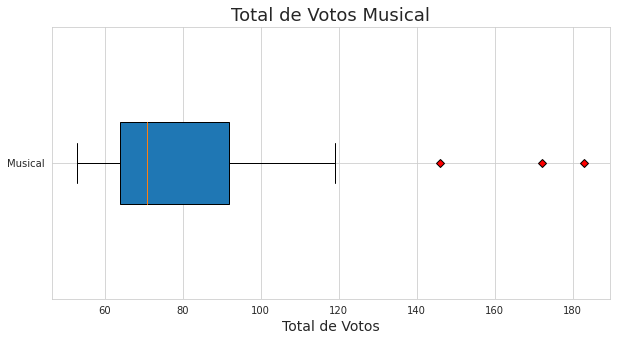

In [55]:
plota_boxplot(generos.columns[12])

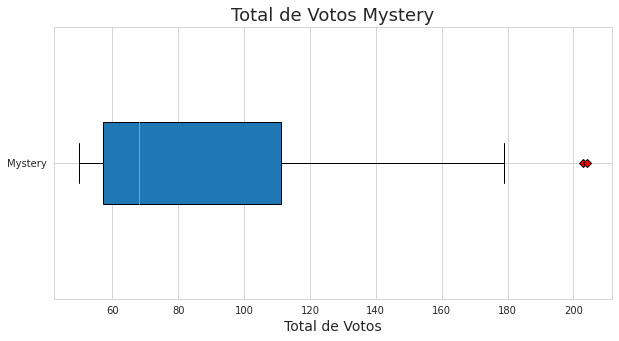

In [56]:
plota_boxplot(generos.columns[13])

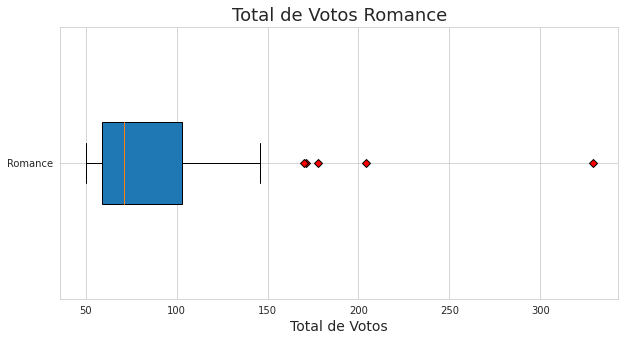

In [57]:
plota_boxplot(generos.columns[14])

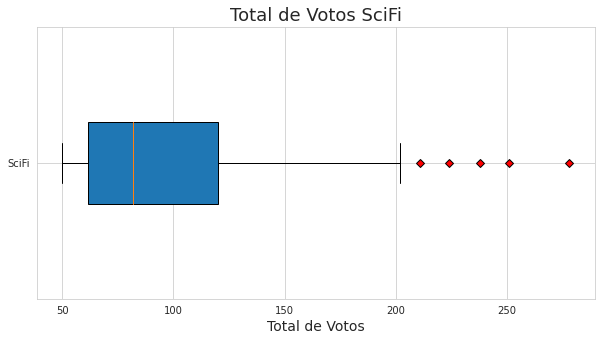

In [58]:
plota_boxplot(generos.columns[15])

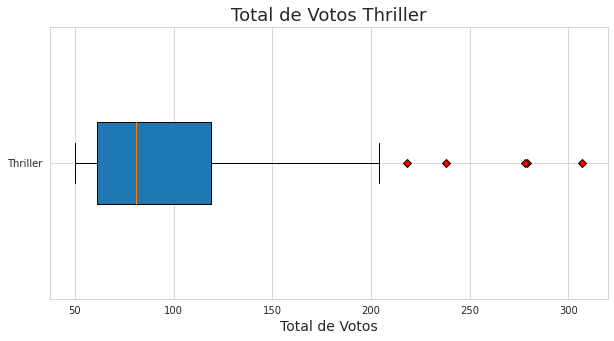

In [59]:
plota_boxplot(generos.columns[16])

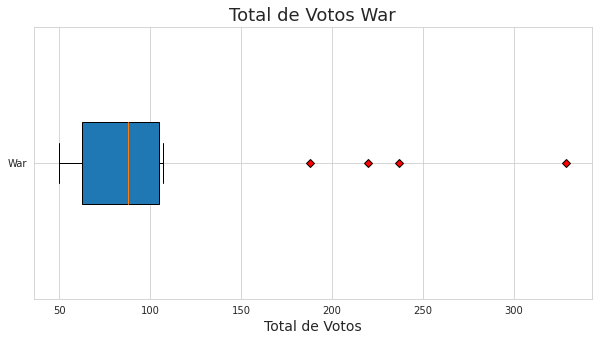

In [60]:
plota_boxplot(generos.columns[17])

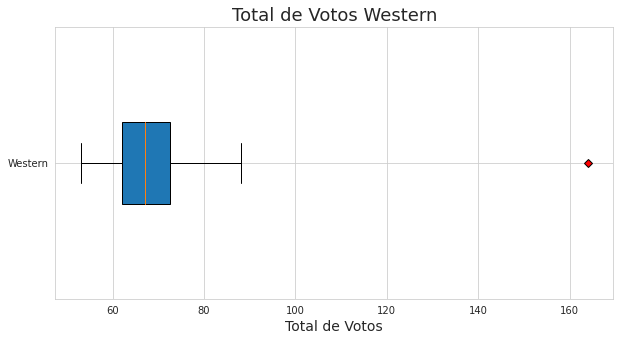

In [61]:
plota_boxplot(generos.columns[18])

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

In [62]:
# criando dois df para depois unilos e conseguir plotar e analisar os generos
# o df contem o total de votos do genero em geral e o total de votos por filme
total_de_votos_adventure = votos_por_filme_generos_ordenada.query('Filmes == "Adventure"')
total_filmes_adventure = filmes.query('Adventure == True')['total_de_votos'].sum()
total_de_votos_adventure['total_de_votos'] = total_filmes_adventure


total_de_votos_horror = votos_por_filme_generos_ordenada.query('Filmes == "Horror"')
total_filmes_horror = filmes.query('Horror == True')['total_de_votos'].sum()
total_de_votos_horror['total_de_votos'] = total_filmes_horror

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [63]:
total_de_votos_adventure.set_index('Filmes', inplace=True)
total_de_votos_horror.set_index('Filmes',inplace=True)

adv_hor = total_de_votos_adventure.append(total_de_votos_horror)
adv_hor
# result = df1.append(df2)

,Votos por Filme,total_de_votos
Filmes,,
Adventure,99.4,13117
Horror,85.2,2215


Text(0.5, 0, '  ')

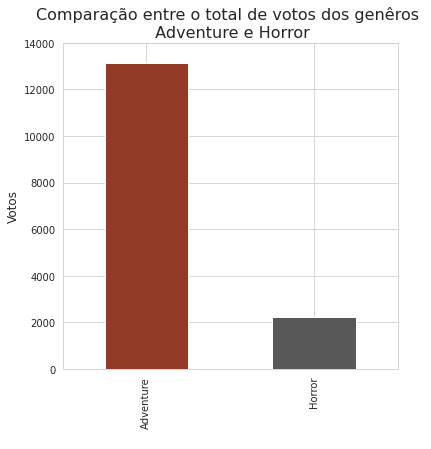

In [64]:
#-- GRAFICO --
adv_hor['total_de_votos'].plot.bar(figsize = (6,6), color=['#933B27', '#585858'])
#-- LEGENDA --
plt.title('Comparação entre o total de votos dos genêros \n Adventure e Horror', fontdict={'fontsize':16})
plt.ylabel('Votos',  fontdict={'fontsize':12})
plt.ylim(0,14000)
plt.xlabel('  ')

Text(0.5, 0, '  ')

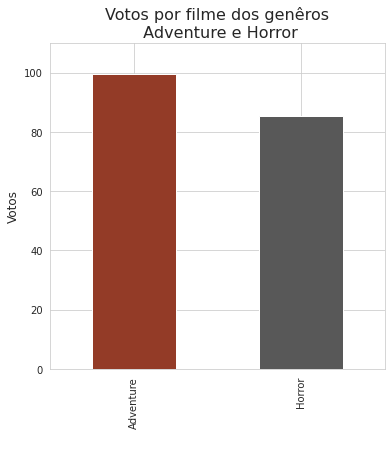

In [65]:
adv_hor['Votos por Filme'].plot.bar(figsize = (6,6), color=['#933B27', '#585858'])
plt.title('Votos por filme dos genêros\n Adventure e Horror', fontdict={'fontsize':16})
plt.ylabel('Votos',  fontdict={'fontsize':12})
plt.ylim(0,110)
plt.xlabel('  ')


### Recomendação de genêro

> Utilizando os gráficos acima para realizar uma análise visual é possível concluir que o genêro Adventure tem muito mais votos que o genêro Horror devido a ter mais filmes lançados. Porém quando análisamos os votos por filmes dos genêros podemos perceber que os dois são bem parecidos, entretanto Adventure ainda possui uma diferença de cerca de 14 votos por filme.
> Sendo assim se fosse para indicar um genêro apenas seria o Adventure, por possuir maior número de votos médios por filmes.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

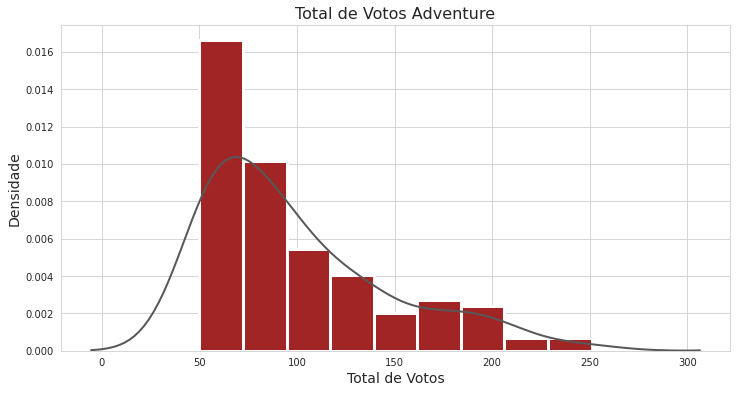

In [66]:
# solucao histograma de aventura
# -- GRAFICO -- 
ax = sns.distplot(filmes_adventure,kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.figure.set_size_inches(12,6)
ax.set_title('Total de Votos Adventure', fontsize = 16)
ax.set_xlabel('Total de Votos',fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14)
ax

Text(0, 0.5, 'Densidade')

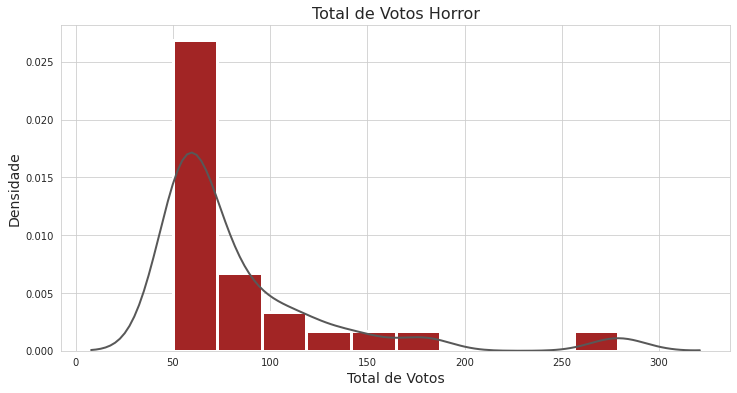

In [67]:
# solucao histograma de horror
# -- GRAFICO -- 
ax = sns.distplot(filmes_horror, kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA --
ax.figure.set_size_inches(12,6)
ax.set_title('Total de Votos Horror', fontsize = 16)
ax.set_xlabel('Total de Votos',fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14)

In [68]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

from scipy.stats import normaltest, ranksums

_, p_value = normaltest(filmes_adventure)
print('O p-value para o gênero Adventure é {}'.format(p_value))

_, p_value = normaltest(filmes_horror)
print('O p-value para o gênero Horror é {}'.format(p_value))



O p-value para o gênero Adventure é 5.987863006199139e-06
O p-value para o gênero Horror é 1.2786148884334685e-07


Os dois p-values são menores que 0.05

In [69]:
_,p_value = ranksums(filmes_horror, filmes_adventure)
print('p_value utilizando o teste não-parâmetrico runksums: ', p_value)

p_value utilizando o teste não-parâmetrico runksums:  0.04782366231999856


> Após realizar o plot do histograma, o teste de normalidade e o teste não-parâmetrico, minha sugestão continua a mesma, o melhor genêro entre Horror e Adventure é Adventure.

> Ao observar o histograma do Adventure percebemos que apesar de exister muitos filmes com o total de votos igual a 50 (que é o mínimo possível no dataset)  esse número cai devagar, isso significa que também existem mais filmes com notas maiores.

> Quando observamos o histograma do Horror percebemos que existem muitos filmes com total de votos igual a 50 e esse número cai muito abrupto, sendo assim existem poucos filmes com notas maiores.

> E isso é confirmados pelo teste runksumns mostra que uma amostra é maior que outra




## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0, 0.5, 'Notas Médias')

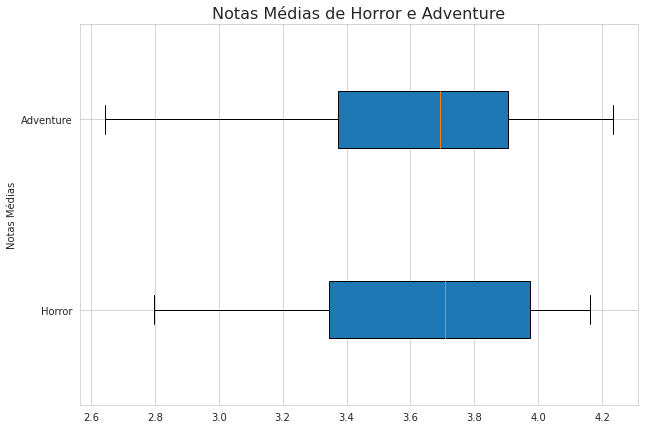

In [70]:
# solução

filmes_adventure_mean = filmes.query('Adventure == True')['nota_media']
filmes_horror_mean = filmes.query('Horror == True')['nota_media']

# -- GRAFICO --
plt.figure(figsize=(10,7))
plt.boxplot([filmes_horror_mean, filmes_adventure_mean], labels = ['Horror', 'Adventure'],
            patch_artist=True, vert=False, widths=.3)

# -- LEGENDA --
plt.title("Notas Médias de Horror e Adventure", fontsize = 16)
plt.ylabel('Notas Médias')

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

>Os dois gêneros apresentam a mediana muito próximas para as notas médias, o gênero Adventure tem mais votos que Horror como gênero e os filmes de Adventure geralmente também tem mais votos que Horror.

>O melhor gênero a se escolher seria Adventure, pois possue as maiores notas médias.




## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

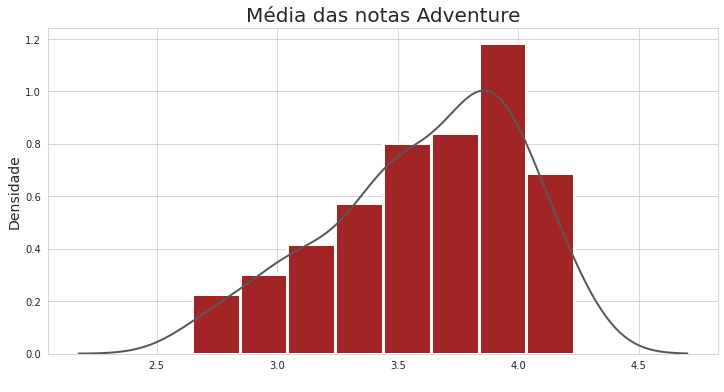

In [71]:
# solucao histograma de aventura
# -- GRAFICO -- 
ax = sns.distplot(filmes_adventure_mean,kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.figure.set_size_inches(12,6)
ax.set_title('Média das notas Adventure', fontsize = 20)
ax.set_xlabel(' ')
ax.set_ylabel('Densidade', fontsize = 14)
ax


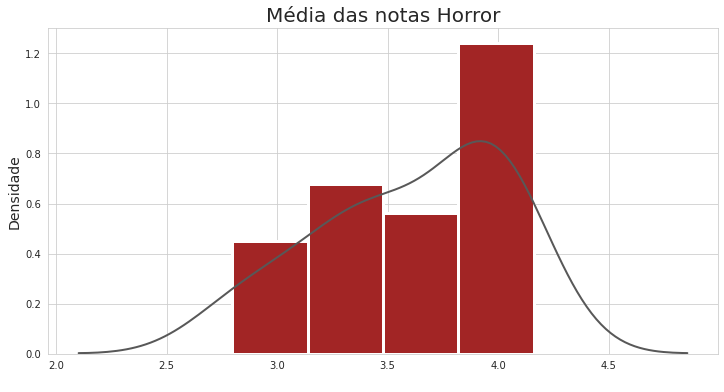

In [72]:
# solucao histograma de aventura
# -- GRAFICO -- 
ax = sns.distplot(filmes_horror_mean,kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.figure.set_size_inches(12,6)
ax.set_title('Média das notas Horror', fontsize = 20)
ax.set_xlabel(' ')
ax.set_ylabel('Densidade', fontsize = 14)
ax

In [73]:
_, p_value = normaltest(filmes_adventure_mean)
print('O p-value para o gênero Adventure é {}'.format(p_value))

_, p_value = normaltest(filmes_horror_mean)
print('O p-value para o gênero Horror é {}'.format(p_value))


O p-value para o gênero Adventure é 0.012835697582553224
O p-value para o gênero Horror é 0.21186284682483916


In [74]:
from statsmodels.stats.weightstats import DescrStatsW

descr_filmes_adventure = DescrStatsW(filmes_adventure_mean)
descr_filmes_horror = DescrStatsW(filmes_horror_mean)

comparacao = descr_filmes_adventure.get_compare(descr_filmes_horror)
comparacao.summary()


,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0048,0.085,0.057,0.955,-0.163,0.173


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



> Sim, observando os histogramas é possível concluir que o genêro Adventure possui maiores notas médias alcançadas. E a maior nota media alcançada por Horror não chega a 4.2 enquanto Adventure passa dessa nota média.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

In [0]:
# análise adventure
medias_notas_medias_adventure = filmes_adventure.mean()
mediana_nota_adventure = filmes_adventure.median()
minimo_nota_adventure = filmes_adventure.min()
maximo_nota_adventure = filmes_adventure.max()
total_filmes_adventure = filmes.query('Adventure == True')['total_de_votos'].sum()

In [76]:
print('A média da nota média de todos os filmes do gênero Adventure é: {:.2f} '.format(medias_notas_medias_adventure))
print('A mediana da nota média de todos os filmes do gênero Adventure é: {:.2f} '.format(mediana_nota_adventure))
print('A nota máxima já atingida por um filme do gênero Adventure é: {:.2f} '.format(maximo_nota_adventure))
print('A nota mínima já atingida por um filme do gênero Adventure é: {:.2f}'.format(minimo_nota_adventure))
print('Foram produzidos {} filmes do gênero Adventure'.format(total_filmes_adventure))

A média da nota média de todos os filmes do gênero Adventure é: 99.37 
A mediana da nota média de todos os filmes do gênero Adventure é: 87.00 
A nota máxima já atingida por um filme do gênero Adventure é: 251.00 
A nota mínima já atingida por um filme do gênero Adventure é: 50.00
Foram produzidos 13117 filmes do gênero Adventure


In [0]:
# análise horror
medias_notas_medias_horror = filmes_horror.mean()
mediana_nota_horror = filmes_horror.median()
minimo_nota_horror = filmes_horror.min()
maximo_nota_horror = filmes_horror.max()
total_filmes_horror = filmes.query('Horror == True')['total_de_votos'].sum()

In [78]:
print('A média da nota média de todos os filmes do gênero Horror é: {:.2f} '.format(medias_notas_medias_horror))
print('A nota máxima já atingida por um filme do gênero Horror é: {:.2f} '.format(maximo_nota_horror))
print('A nota mínima já atingida por um filme do gênero Horror é: {:.2f}'.format(minimo_nota_horror))
print('Foram produzidos {} filmes do gênero Horror'.format(total_filmes_horror))

A média da nota média de todos os filmes do gênero Horror é: 85.19 
A nota máxima já atingida por um filme do gênero Horror é: 279.00 
A nota mínima já atingida por um filme do gênero Horror é: 50.00
Foram produzidos 2215 filmes do gênero Horror


In [0]:
#criando array das variaveis criadas na análise dos generos adventure e horror
#foram utilizadas a media das notas medias, mediana,  a nota minima, nota maxima e o total de filmes

adventure = np.array([medias_notas_medias_adventure,mediana_nota_adventure, minimo_nota_adventure, maximo_nota_adventure, total_filmes_adventure])
horror = np.array([medias_notas_medias_horror,mediana_nota_horror, minimo_nota_horror, maximo_nota_horror, total_filmes_horror])

adv_hor = pd.DataFrame([adventure, horror], columns=['Média','Mediana' ,'Minimo', 'Maximo', 'Total'], index=['Adventure', 'Horror']).T

Text(0.5, 0, ' ')

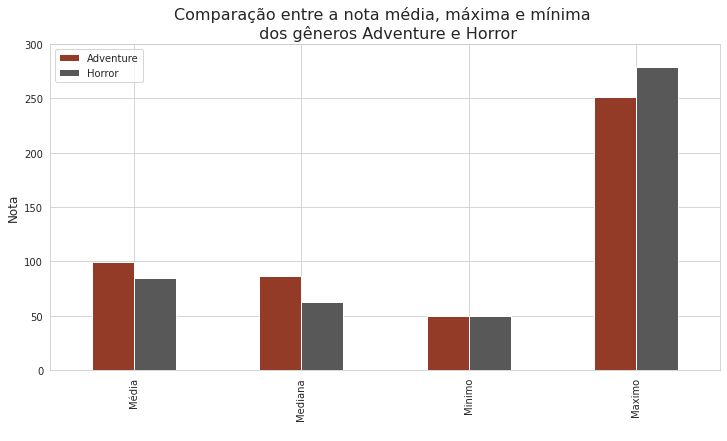

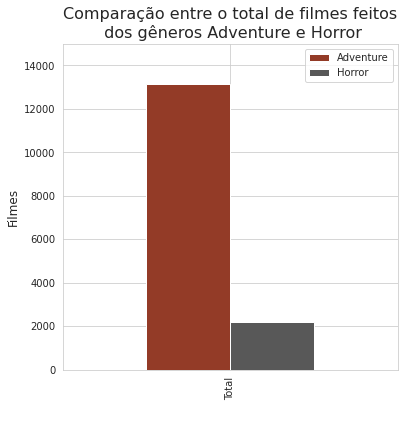

In [80]:
adv_hor[:4].plot.bar(figsize = (12,6), color=['#933B27', '#585858'])
plt.title('Comparação entre a nota média, máxima e mínima \n dos gêneros Adventure e Horror', fontdict={'fontsize':16})
plt.ylabel('Nota',  fontdict={'fontsize':12})
plt.ylim(0,300)
plt.xlabel(' ')


adv_hor[-1:].plot.bar(figsize = (6,6), color=['#933B27', '#585858'])
plt.title('Comparação entre o total de filmes feitos\n dos gêneros Adventure e Horror', fontdict={'fontsize':16})
plt.ylabel('Filmes',  fontdict={'fontsize':12})
plt.ylim(0,15000)
plt.xlabel(' ')

> Utilizando os gráficos acima é possível concluir que as notas médias não tem muita difereça quando comparamos os dois gêneros, mas quando comparamos o total de votos recebidos vemos que o genêro Adventure possui muito mais votos, possuindo assim mais engajamento. Sendo assim o melhor genêro é Adventure.


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [81]:
# solução: calculando os 2 generos mais votados

# O DataFrame df_votos já está com os gêneros do mais votado para o menos votado
df_votos.columns[:2]


Index(['Action', 'Drama'], dtype='object')

Os dois gêneros mais votados são Action e Drama

In [0]:
# solução: encontrando os top 5 filmes desses generos

# votos_action e votos_drama são listas que contém apenas os 5 maiores votos de 
# cada gênero
votos_action = sorted((filmes.query('Action == True')['nota_media']), reverse = True)
votos_action = votos_action[0:5]

votos_drama = sorted((filmes.query('Drama == True')['nota_media']), reverse = True)
votos_drama = votos_drama[:5]

In [0]:
filmes['nota_media_arredondado'] = filmes['nota_media'].round(2) # a coluna nota_media_arredondado foi criada para realizar a query

In [84]:

filmes_action = filmes.query('nota_media_arredondado == [4.27, 4.24, 4.23, 4.23, 4.22] & Action == 1 ')
filmes_action = filmes_action.drop(1208) # o filme 1208 foi retirado para ter apenas 5 filmes 
filmes_action = filmes_action.sort_values(by='nota_media', ascending=False)

nome_media_action = {'Filmes (Action)': filmes_action['titulo'],
               'Nota Média': votos_action}
nome_media_action = pd.DataFrame(nome_media_action)
nome_media_action


,Filmes (Action),Nota Média
filmeId,,
2959,Fight Club (1999),4.272936
58559,"Dark Knight, The (2008)",4.238255
1197,"Princess Bride, The (1987)",4.232394
260,Star Wars: Episode IV - A New Hope (1977),4.231076
1196,Star Wars: Episode V - The Empire Strikes Back...,4.219626


In [85]:
filmes_drama = filmes.query('nota_media_arredondado == [4.43, 4.29, 4.27, 4.27, 4.26] & Drama == 1 ')
filmes_drama = filmes_drama.sort_values(by='nota_media', ascending=False)

nome_media_drama = {'Filmes (Drama)': filmes_drama['titulo'],
               'Nota Média': votos_drama}
nome_media_drama = pd.DataFrame(nome_media_drama)
nome_media_drama

,Filmes (Drama),Nota Média
filmeId,,
318,"Shawshank Redemption, The (1994)",4.429022
858,"Godfather, The (1972)",4.289062
2959,Fight Club (1999),4.272936
1276,Cool Hand Luke (1967),4.271930
1221,"Godfather: Part II, The (1974)",4.259690


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [86]:
# solucao
filmes.corr().round(3)

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western,nota_media_arredondado
ano_de_lancamento,1.000,-0.159,-0.029,0.140,0.114,-0.053,-0.149,0.019,0.061,0.048,0.028,-0.077,0.002,-0.027,0.248,-0.296,0.006,-0.025,0.070,0.104,0.026,-0.063,-0.159
nota_media,-0.159,1.000,0.343,-0.154,-0.080,0.043,-0.030,-0.256,0.190,-0.003,0.278,-0.021,0.082,-0.034,0.065,-0.009,0.130,-0.072,-0.137,-0.017,0.126,-0.060,1.000
total_de_votos,-0.029,0.343,1.000,0.066,0.104,0.023,0.002,-0.129,0.080,-0.055,0.019,-0.010,-0.039,-0.036,-0.016,-0.025,-0.007,-0.045,0.064,0.086,0.088,-0.061,0.343
Action,0.140,-0.154,0.066,1.000,0.334,-0.174,-0.213,-0.292,0.062,-0.051,-0.254,-0.118,-0.023,-0.009,0.130,-0.146,-0.064,-0.200,0.326,0.311,0.071,0.047,-0.155
Adventure,0.114,-0.080,0.104,0.334,1.000,0.164,0.179,-0.091,-0.241,-0.043,-0.290,0.243,-0.061,-0.097,0.218,-0.050,-0.090,-0.174,0.279,-0.005,-0.087,0.045,-0.080
Animation,-0.053,0.043,0.023,-0.174,0.164,1.000,0.754,0.126,-0.092,-0.018,-0.122,0.227,-0.026,-0.069,0.108,0.431,-0.053,0.021,-0.097,-0.168,-0.058,-0.046,0.043
Children,-0.149,-0.030,0.002,-0.213,0.179,0.754,1.000,0.120,-0.130,-0.023,-0.126,0.372,-0.032,-0.085,0.093,0.407,-0.078,-0.016,-0.101,-0.207,-0.072,-0.057,-0.030
Comedy,0.019,-0.256,-0.129,-0.292,-0.091,0.126,0.120,1.000,-0.126,0.013,-0.289,0.095,-0.078,-0.028,-0.155,0.055,-0.200,0.229,-0.214,-0.365,-0.082,0.005,-0.255
Crime,0.061,0.190,0.080,0.062,-0.241,-0.092,-0.130,-0.126,1.000,-0.033,0.092,-0.155,0.193,-0.049,-0.033,-0.108,0.114,-0.207,-0.178,0.249,-0.075,-0.081,0.190
Documentary,0.048,-0.003,-0.055,-0.051,-0.043,-0.018,-0.023,0.013,-0.033,1.000,0.018,-0.028,-0.006,-0.017,-0.017,-0.015,-0.020,-0.032,-0.034,-0.041,-0.014,-0.011,-0.003


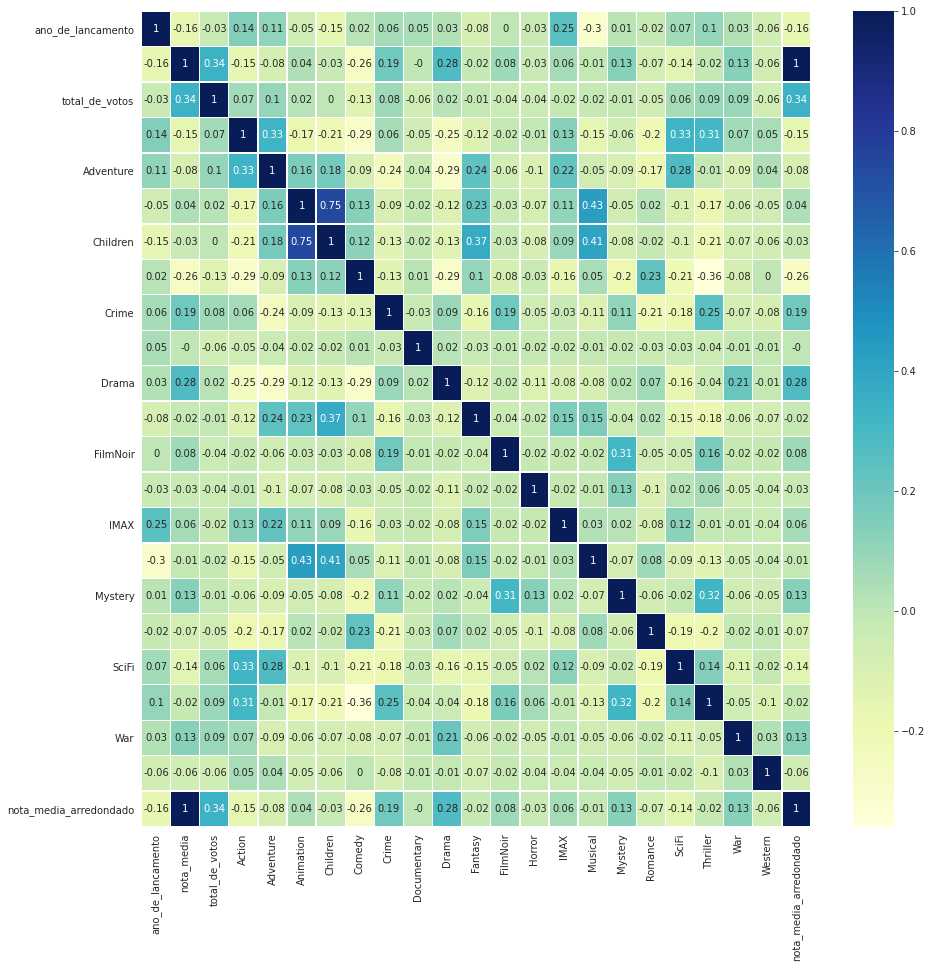

In [107]:
# heatmap criado apenas para ajudar na visualização da matriz correlação
ax = sns.heatmap(filmes.corr().round(2), annot=True, linewidths=.3, cmap="YlGnBu")
ax.figure.set_size_inches(15,15)


In [88]:
# Os gêneros com maior correlação com nota_media são: Drama com a correlação de 0.278
# e Comedy com a correlação de -0.255

# Os gêneros com a menor correlação são: Documentary com a correlação de -0.003
# e Musical com a correlação de -0.009

print('Os gêneros com a maior correlação com nota_media são: Drama e Comedy com correlação de 0.278 e -0.255.')
print('Os gêneros com a menor correlação com nota_media são: Documentary e Musical com correlação de -0.003 e -0.009.')

Os gêneros com a maior correlação com nota_media são: Drama e Comedy com correlação de 0.278 e -0.255.
Os gêneros com a menor correlação com nota_media são: Documentary e Musical com correlação de -0.003 e -0.009.


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [89]:
# solucao
# os dois gêneros com maior correlação com total_de_votos são: Adventure com a correlação de 0.104
# e Comedy com a correlação -0.129

# Os gêneros com a menor correlação são: Children com a correlação de 0.002
# e Mystery com a correlação de -0.007

print('Os gêneros com a maior correlação com total_de_votos são: Adventure e Comedy com correlação de 0.104 e -0.129.')
print('Os gêneros com a menor correlação com total_de_votos são: Children e Mystery com correlação de 0.002 e -0.007.')

Os gêneros com a maior correlação com total_de_votos são: Adventure e Comedy com correlação de 0.104 e -0.129.
Os gêneros com a menor correlação com total_de_votos são: Children e Mystery com correlação de 0.002 e -0.007.


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0, 0.5, 'Nota média')

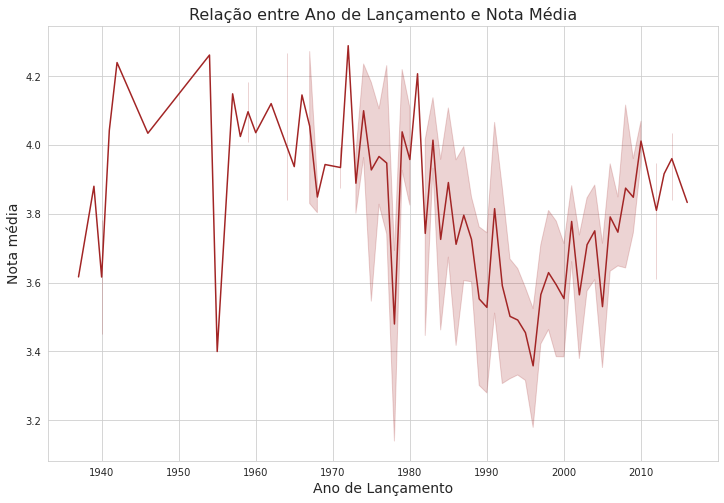

In [90]:
# solucao
# -- GRAFICO -- 
ax = sns.lineplot(y = 'nota_media', x = 'ano_de_lancamento', markers=True, dashes=False, data = filmes, color = "#A22525")

# -- LEGENDA -- 
ax.figure.set_size_inches(12,8)
ax.set_title('Relação entre Ano de Lançamento e Nota Média', fontsize = 16)
ax.set_xlabel('Ano de Lançamento',fontsize = 14)
ax.set_ylabel('Nota média', fontsize = 14)

Text(0, 0.5, 'Nota média')

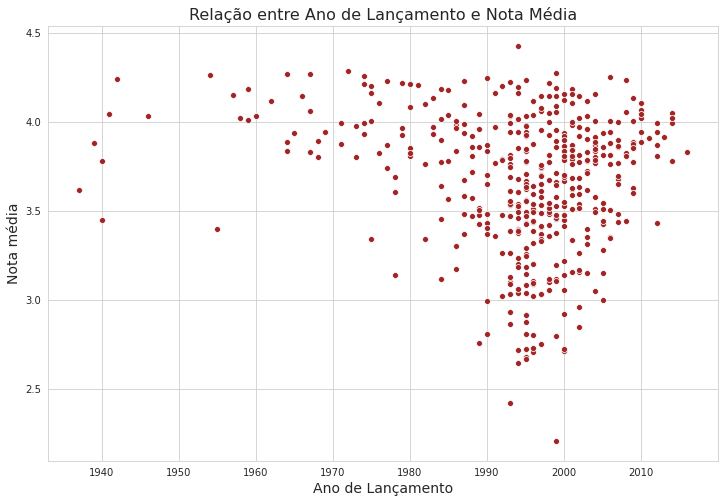

In [91]:
ax = sns.scatterplot(y = 'nota_media', x = 'ano_de_lancamento', data = filmes, color = "#A22525")
ax.figure.set_size_inches(12,8)
ax.set_title('Relação entre Ano de Lançamento e Nota Média', fontsize = 16)
ax.set_xlabel('Ano de Lançamento',fontsize = 14)
ax.set_ylabel('Nota média', fontsize = 14)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [92]:
# solução (código)
corr_ano_media = filmes.corr()['nota_media']['ano_de_lancamento']
corr_ano_media

-0.1591455520444448

### Solução (explicação):
> Os dados ano_de_lancamento e nota_media tem um correlação negativa, quanto mais ano_de_lancamento aumenta mais nota_media diminui, isto pode ser observado no gráfico acima. Um dos motivos que pode ter gerado esse tipo de correlação é que foram dado menos notas ao filmes mais antigos.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.05, 'Pairplot das Variáveis')

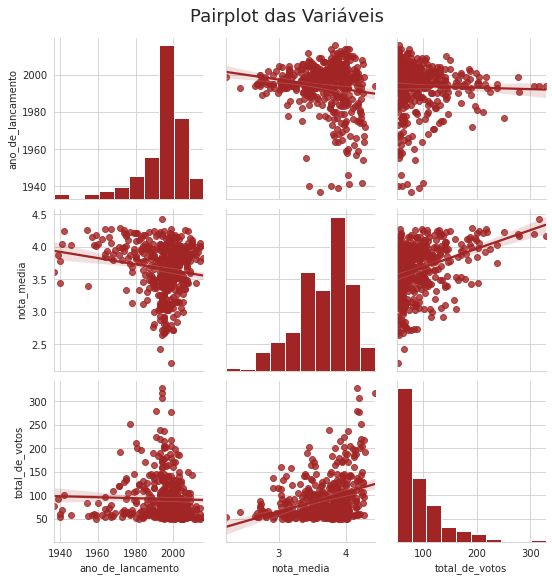

In [93]:
# solução
# -- GRAFICO -- 
infos = ['ano_de_lancamento', 'nota_media', 'total_de_votos']

# --LEGENDA -- 
ax = sns.pairplot(filmes,x_vars=infos, y_vars=infos, kind = 'reg', plot_kws=dict(color='#A22525'),
                  diag_kws=dict(color='#A22525'))
ax.fig.suptitle('Pairplot das Variáveis', fontsize = 18 , y = 1.05)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

In [0]:
filmes_animation = filmes.query('Animation == True')[['total_de_votos', 'ano_de_lancamento', 'nota_media']]

Text(0.5, 1.05, 'Pairplot dos Gênero Animation')

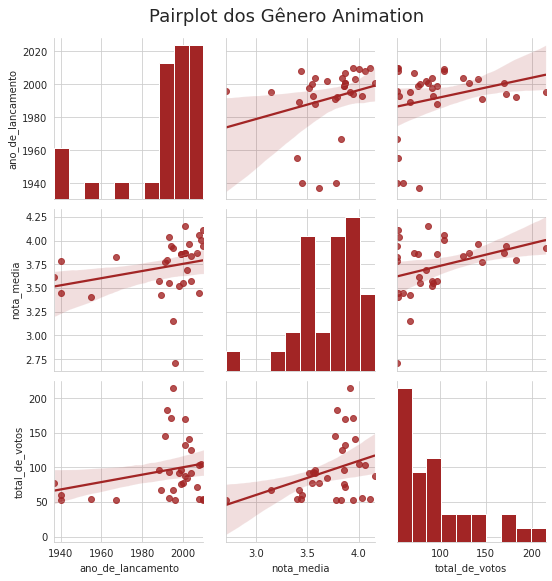

In [95]:
# -- GRAFICO --
ax = sns.pairplot(filmes_animation, x_vars = infos, y_vars = infos, 
             kind = 'reg', plot_kws=dict(color='#A22525'),
                  diag_kws=dict(color='#A22525'))
# -- LEGENDA --
ax.fig.suptitle('Pairplot dos Gênero Animation', fontsize = 18 , y = 1.05)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
> 


In [0]:
# a funcao faz o plot dos graficos recebendo como parametro o um dataframe
def plota_reg(df):
  ax = sns.regplot(x='ano_de_lancamento', y=df.columns[0], data = df,color='#A22525')
  ax.figure.set_size_inches(12,6)
  return ax
  

(1935.0, 2015.0)

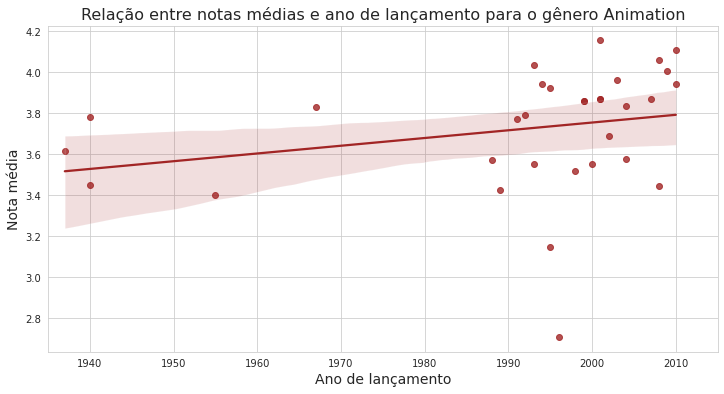

In [97]:
filmes_animation_ax = filmes_animation[['nota_media','ano_de_lancamento']]

ax = plota_reg(filmes_animation_ax)
ax.set_title('Relação entre notas médias e ano de lançamento para o gênero Animation', fontdict={'fontsize':16})
ax.set_xlabel('Ano de lançamento',fontdict={'fontsize':14})
ax.set_ylabel('Nota média',fontdict={'fontsize':14})
axes = ax.axes
axes.set_xlim(1935,2015)


(1935.0, 2015.0)

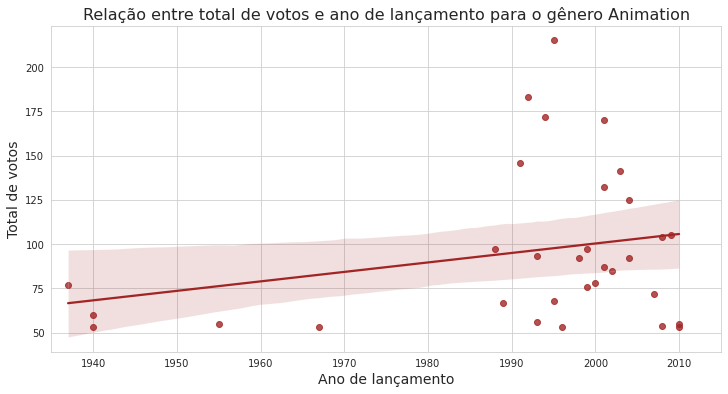

In [98]:
filmes_animation_ax2 = filmes_animation[['total_de_votos','ano_de_lancamento']]

ax = plota_reg(filmes_animation_ax2)
ax.set_title('Relação entre total de votos e ano de lançamento para o gênero Animation', fontdict={'fontsize':16})
ax.set_xlabel('Ano de lançamento',fontdict={'fontsize':14})
ax.set_ylabel('Total de votos',fontdict={'fontsize':14})
axes = ax.axes
axes.set_xlim(1935,2015)

> Utilizando os gráficos é possível ver que ao passar dos anos os filmes do genêro Animation parecem receber tanto mais votos totais quanto a média dele aumenta. A correlação entre as variavéis para ambos os gráficos apesar de baixo parece ser linear. 

> Porêm o gráfico apresenta um problema que são pouco dados para filmes antigos, dificultando a análise.

> Sendo assim utilizando esses dados é possível dizer que filmes mais antigos tendem a receber notas menores que filmes mais novos.

### Para os outros gêneros irei realizar a análise para os gêneros IMAX e Action, para escolher os gêneros utilizei o heatmap da matriz correlação.

In [0]:
def dataframe_genero(genero):
  return filmes.query(f'{genero} == True')[['total_de_votos','ano_de_lancamento','nota_media']]

In [100]:
# criando dataframes dos generos IMAX e Action

filmes_IMAX = dataframe_genero('IMAX')

filmes_action = dataframe_genero('Action')

display(filmes_IMAX.head(3))
display(filmes_action.head(3))

,total_de_votos,ano_de_lancamento,nota_media
filmeId,,,
150,201,1995.0,3.845771
364,172,1994.0,3.941860
595,146,1991.0,3.770548


,total_de_votos,ano_de_lancamento,nota_media
filmeId,,,
6,102,1995.0,3.946078
10,132,1995.0,3.496212
70,55,1996.0,3.509091


### IMAX

In [0]:
# preparando df auxiliares para o plot do IMAX
filmes_IMAX_ax = filmes_IMAX[['nota_media','ano_de_lancamento']]

filmes_IMAX_ax2 = filmes_IMAX[['total_de_votos','ano_de_lancamento']]

(1990.0, 2015.0)

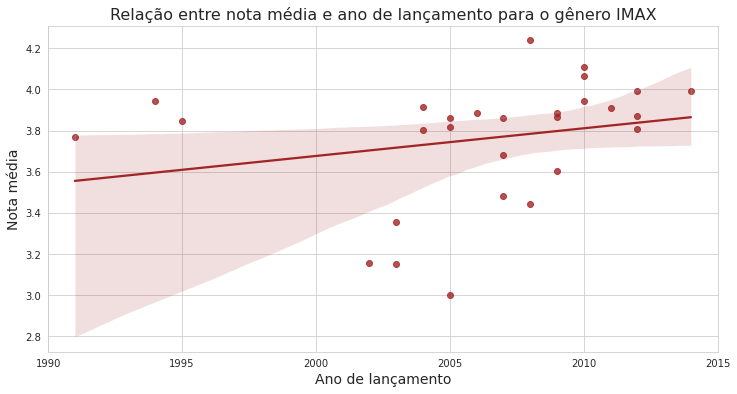

In [102]:
# plot do IMAX
# --GRAFICO--
ax = plota_reg(filmes_IMAX_ax)

# --LEGENDA --
ax.set_title('Relação entre nota média e ano de lançamento para o gênero IMAX', fontdict={'fontsize':16})
ax.set_xlabel('Ano de lançamento',fontdict={'fontsize':14})
ax.set_ylabel('Nota média',fontdict={'fontsize':14})
axes = ax.axes
axes.set_xlim(1990,2015)

(1990.0, 2015.0)

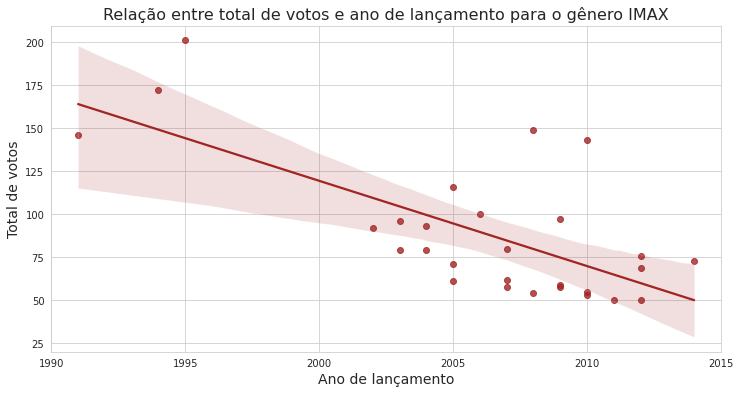

In [103]:
ax = plota_reg(filmes_IMAX_ax2)
ax.set_title('Relação entre total de votos e ano de lançamento para o gênero IMAX', fontdict={'fontsize':16})
ax.set_xlabel('Ano de lançamento',fontdict={'fontsize':14})
ax.set_ylabel('Total de votos',fontdict={'fontsize':14})
axes = ax.axes
axes.set_xlim(1990,2015)

> Quando analisamos os gráfico para o genêro IMAX é possivel ver que a média de votos aumenta com o passar dos anos, e o contrario ocorre com o número de votos.

ACTION

In [0]:
# preparando df auxiliares para o plot do action
filmes_action_ax = filmes_action[['nota_media','ano_de_lancamento']]

filmes_action_ax2 = filmes_action[['total_de_votos','ano_de_lancamento']]

(1955.0, 2018.0)

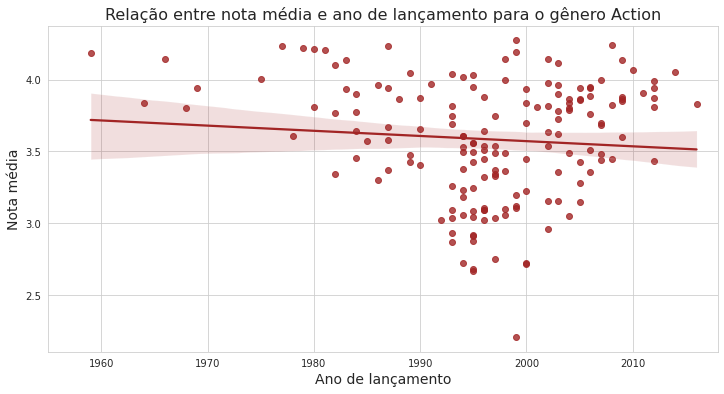

In [105]:
# plot do action
ax = plota_reg(filmes_action_ax)
ax.set_title('Relação entre nota média e ano de lançamento para o gênero Action', fontdict={'fontsize':16})
ax.set_xlabel('Ano de lançamento',fontdict={'fontsize':14})
ax.set_ylabel('Nota média',fontdict={'fontsize':14})
axes = ax.axes
axes = ax.axes
axes.set_xlim(1955,2018)

(1955.0, 2018.0)

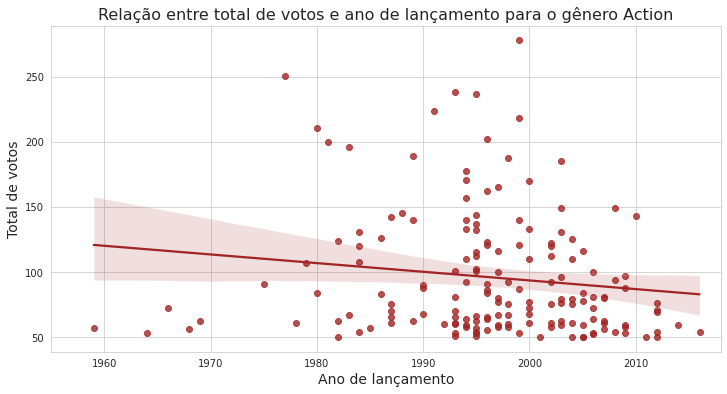

In [106]:
ax = plota_reg(filmes_action_ax2)
ax.set_title('Relação entre total de votos e ano de lançamento para o gênero Action', fontdict={'fontsize':16})
ax.set_xlabel('Ano de lançamento',fontdict={'fontsize':14})
ax.set_ylabel('Total de votos',fontdict={'fontsize':14})
axes = ax.axes
axes = ax.axes
axes.set_xlim(1955,2018)

> Quando olhamos para o primeiro gráfico do genêro Action é possível perceber que apesar de pequena existe uma tendência pequena para as notas diminuirem, ao passar dos anos as notas vão diminuirem, mas um dos motivos que pode explicar essa tendência é um grupo de filmes com notas abaixo do padrão no periodo de 1990 até 2005.

> No segundo gráfico é possivel também ver a tendência de o total de votos diminuir, um dos motivos pode ser a quantidade de filmes produzidos no periodo de 1980 e 2005

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

> Uma visualização que achei interresante acrescentar foi o heatmap para a matrix de correlação, pois na minha opnião fica mais fácil a visualização das realações

> Outra visualização é o scatterplot para a realação entre o ano de lançamento e a nota média para conseguir visualizar todas as notas